# Some more basic song stats (to guide deep network training)

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import sys

from disp import set_plot

cc = np.concatenate

FPS = 30.03
DT = 1/FPS

In [8]:
# SPECIFY STRAINS USED
STRAINS = ['NM91', 'ZH23']
STRAIN_KEY = '_'.join(STRAINS).lower()

FSTRAIN = 'data/simple/strains.csv'
MSTRAINS = [(pd.read_csv(FSTRAIN)['STRAIN'] == strain) for strain in STRAINS]
MSTRAIN = np.any(MSTRAINS, axis=0)
ISTRAIN = MSTRAIN.nonzero()[0]

NTR = len(ISTRAIN)

In [9]:
df_behav = pd.read_csv('data/simple/c_song_f_behav.csv')
df_behav

,ID,FRAME,T,Q,S,P,F,FFV,FFA,FLS,FRS,FMFV,FMLS
0,0,0,0.000000,1,0,0,0,0.231,0.0000,0.159,0.077,-0.058526,0.274257
1,0,1,0.033300,1,0,0,0,0.314,0.0385,0.025,0.044,0.100623,0.298490
2,0,2,0.066600,1,0,0,0,0.308,0.0025,0.029,0.011,0.147629,0.271865
3,0,3,0.099900,1,0,0,0,0.319,0.0020,0.016,0.016,0.091174,0.306112
4,0,4,0.133200,1,0,0,0,0.312,-0.0315,0.030,0.002,0.065871,0.306439
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4978565,275,27100,902.430902,1,0,0,0,0.217,0.0280,0.029,0.058,-0.171418,0.136184
4978566,275,27101,902.464202,1,0,0,0,0.210,-0.1045,0.138,0.322,0.032522,0.249171
4978567,275,27102,902.497502,1,0,0,0,0.008,-0.0910,0.034,0.260,0.033202,0.010844
4978568,275,27103,902.530803,1,0,0,0,0.028,0.0695,0.010,0.090,0.012059,0.027177


In [10]:
# split big df into dfs for individual trials
n_tr = np.max(df_behav.ID) + 1
dfs_tr = [df_behav[df_behav.ID == i] for i in ISTRAIN]

df_behav = None

In [ ]:
nts_tr = np.array([len(df_tr) for df_tr in dfs_tr])
nt_total = nts_tr.sum()

In [24]:
print('Num trials:', NTR)
print('Total time points:', nt_total)
print('Min trial dur:', nts_tr.min())
print('Mean trial dur:', nts_tr.mean())
print('Max trial dur:', nts_tr.max())

Num trials: 87
Total time points: 1548531
Min trial dur: 1816
Mean trial dur: 17799.206896551725
Max trial dur: 54054


In [19]:
frcs_sing = np.array([1-np.mean(df_tr['Q']) for df_tr in dfs_tr])
frcs_s = np.array([np.mean(df_tr['S']) for df_tr in dfs_tr])
frcs_p = np.array([1-np.mean(df_tr['Q'])-np.mean(df_tr['S']) for df_tr in dfs_tr])

In [27]:
print('Min frac sing', frcs_sing.min())
print('Mean frac sing', frcs_sing.mean())
print('Max frac sing', frcs_sing.max())
print()
print('Min frac sine', frcs_s.min())
print('Mean frac sine', frcs_s.mean())
print('Max frac sine', frcs_s.max())
print()
print('Min frac pulse', frcs_p.min())
print('Mean frac pulse', frcs_p.mean())
print('Max frac pulse', frcs_p.max())

Min frac sing 0.030399061032863828
Mean frac sing 0.285941388561646
Max frac sing 0.6890165186922044

Min frac sine 0.012472431363601795
Mean frac sine 0.17337274609681283
Max frac sine 0.43447293447293445

Min frac pulse 0.013967136150234719
Mean frac pulse 0.11256864246483325
Max frac pulse 0.2577917116737361


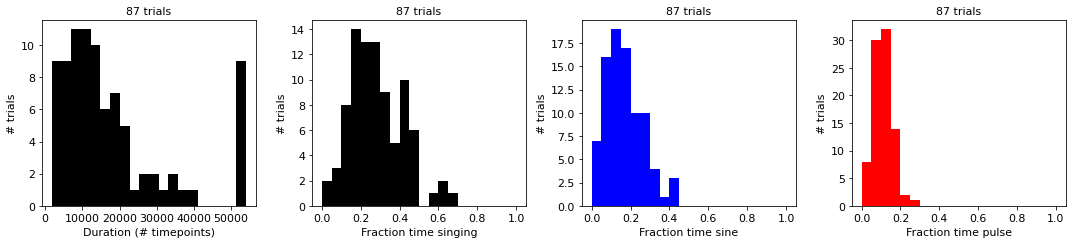

In [37]:
title = f'{NTR} trials'

fig, axs = plt.subplots(1, 4, figsize=(15, 3.5), tight_layout=True)
axs[0].hist(nts_tr, bins=20, color='k')
set_plot(axs[0], x_label='Duration (# timepoints)', y_label='# trials', title=title, font_size=11)

axs[1].hist(frcs_sing, bins=np.linspace(0, 1, 21), color='k')
set_plot(axs[1], x_label='Fraction time singing', y_label='# trials', title=title, font_size=11)

axs[2].hist(frcs_s, bins=np.linspace(0, 1, 21), color='b')
set_plot(axs[2], x_label='Fraction time sine', y_label='# trials', title=title, font_size=11)

axs[3].hist(frcs_p, bins=np.linspace(0, 1, 21), color='r')
set_plot(axs[3], x_label='Fraction time pulse', y_label='# trials', title=title, font_size=11)